### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [206]:
data = pd.read_csv('data/coupons.csv')

In [207]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

Drop the nan in the following Columns ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Drop the 'car' column as it is not providing any valuable data for the coupon decision and creates an uneven dataframe. 
Rename "passanger" column to correct to "passenger"
Age has a few weird values in string vs. integers. Replacing below21 and 50plus with integers and changing type to integer. 
Replaced "Carry out & take Away" for "Carry Away"
Converting coupong to string to be able to use it as a hue on seaborn. 

In [209]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [210]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [211]:
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [212]:
data[data['CoffeeHouse'].isnull()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


In [213]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [214]:
df=data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
df = df.drop(columns=['car'])
df = df.rename(columns={'passanger':'passenger'})
df['coupon'] = df['coupon'].replace({'Carry out & Take away': 'Carry Away'})
df['age'] = df['age'].replace('below21','20')
df['age'] = df['age'].replace('50plus','51')
df['age']= df['age'].astype(int)
df['Y'] = df['Y'].astype(str)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



In [215]:
print(df[df['Y'] == '1'].size / df.size)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

In [216]:
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry Away',
       'Restaurant(20-50)'], dtype=object)

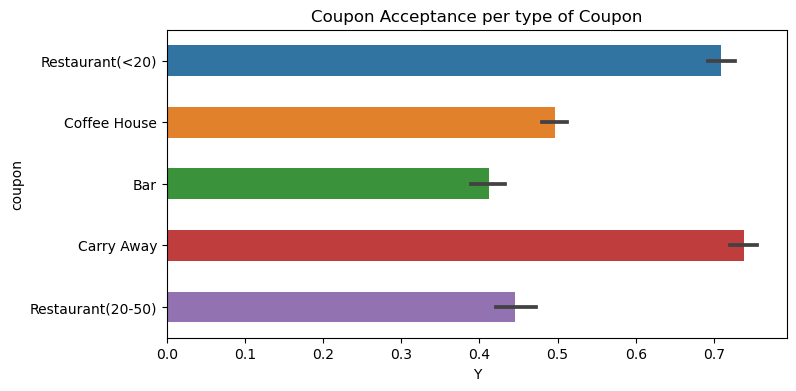

In [217]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Y'].astype(int), y= 'coupon', data = df, width = 0.5).set_title('Coupon Acceptance per type of Coupon')
plt.savefig('images/coupon_bar')

6. Use a histogram to visualize the temperature column.

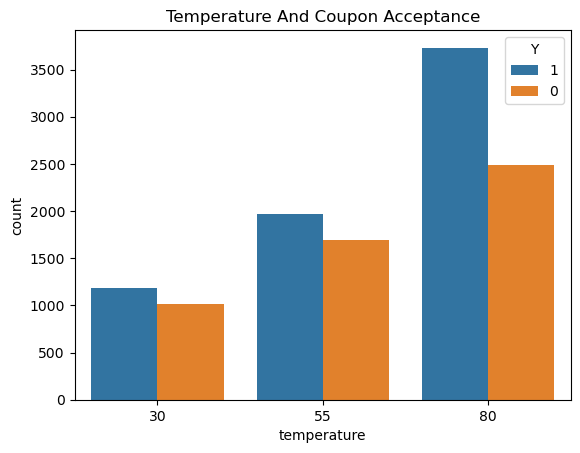

In [218]:
sns.countplot(df, x='temperature', hue='Y').set(title='Temperature And Coupon Acceptance')
plt.savefig('images/temperature_hist.png')

In [219]:
df['Y'].unique()

array(['1', '0'], dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [220]:
df_bar = df[df['coupon'] == 'Bar']
df_bar

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [221]:
print("Bar coupons overall acceptance rate: ", df_bar[df_bar['Y'] == '1'].size / df_bar.size)

Bar coupons overall acceptance rate:  0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [222]:
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [223]:
bar_3orless = ['never', 'less1', '1~3']
df_bar_3orless = df_bar.query('Bar in @bar_3orless')
df_bar_3ormore = df_bar.query('Bar not in @bar_3orless')
print('Acceptance rate for those go to a bar 3 or fewer times a month is: ', df_bar_3orless[df_bar_3orless['Y']=='1'].size/df_bar_3orless.size)
print('Acceptance rate for those go to a bar 3 or more times a month is: ', df_bar_3ormore[df_bar_3ormore['Y']=='1'].size/df_bar_3ormore.size)


Acceptance rate for those go to a bar 3 or fewer times a month is:  0.37267441860465117
Acceptance rate for those go to a bar 3 or more times a month is:  0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [224]:
bar_morethan1 = ['1~3', 'gt8', '4~8']
df_bar_morethan1 = df_bar.query('Bar in @bar_morethan1 and age>25')
print('Acceptance rate for those go to a bar more than once per month and are over 25 years old is: ', df_bar_morethan1[df_bar_morethan1['Y']=='1'].size/df_bar_morethan1.size)
df_bar_notmorethan1 = df_bar.query('Bar not in @bar_morethan1 or age<=25')
print('Acceptance rate for those go to a bar less than once per month or are 25 years old and younger is: ', df_bar_notmorethan1[df_bar_notmorethan1['Y']=='1'].size/df_bar_notmorethan1.size)



Acceptance rate for those go to a bar more than once per month and are over 25 years old is:  0.6898263027295285
Acceptance rate for those go to a bar less than once per month or are 25 years old and younger is:  0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [225]:
df_bar['passenger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [226]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [227]:
passenger_kid = ['Kid(s)']
Occupation_farming = ['Farming Fishing & Forestry']
df_bar_morethan1_notkids_notfarming = df_bar.query('Bar in @bar_morethan1 and passenger not in @passenger_kid and occupation not in @Occupation_farming')
print('Acceptance rate for those go to a bar more than once per month, did not have kids passengers and were not in farming is: ', df_bar_morethan1_notkids_notfarming[df_bar_morethan1_notkids_notfarming['Y']=='1'].size/df_bar_morethan1_notkids_notfarming.size)
df_bar_notmorethan1_kids_farming = df_bar.query('Bar not in @bar_morethan1 or passenger in @passenger_kid or occupation in @Occupation_farming')
print('Acceptance rate for those go to a bar less than once per month or had kids as passengers or are in farming is: ', df_bar_notmorethan1_kids_farming[df_bar_notmorethan1_kids_farming['Y']=='1'].size/df_bar_notmorethan1_kids_farming.size)


Acceptance rate for those go to a bar more than once per month, did not have kids passengers and were not in farming is:  0.7094339622641509
Acceptance rate for those go to a bar less than once per month or had kids as passengers or are in farming is:  0.29790310918293567


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [228]:
df_bar['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [229]:
df_bar['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [230]:
df_bar['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [231]:
widowed = ['Widowed']
df_bar_morethan1_notkid_notwidowed = df_bar.query('Bar in @bar_morethan1 and maritalStatus not in @widowed and passenger not in @passenger_kid')
print('Acceptance rate for those go to a bar more than once per month, did not have kids passengers and are not widowed: ', df_bar_morethan1_notkid_notwidowed[df_bar_morethan1_notkid_notwidowed['Y']=='1'].size/df_bar_morethan1_notkid_notwidowed.size)
df_bar_morethan1_under30 = df_bar.query('Bar in @bar_morethan1 and age<30')
print('Acceptance rate for those go to a bar more than once per month and are under 30: ', df_bar_morethan1_under30[df_bar_morethan1_under30['Y']=='1'].size/df_bar_morethan1_under30.size)
rest_often = ['4~8', 'gt8']
income_under50 = ['$12500 - $24999','$37500 - $49999', '$25000 - $37499','Less than $12500']
cheaprest_incomeunder50 = df_bar.query('Bar in @bar_morethan1 and RestaurantLessThan20 in @rest_often and income in @income_under50')
print('Acceptance rate for those go to a bar more than once per month and go to cheap restaurants more than 4 times per month and whose income is under 50k is: ', cheaprest_incomeunder50[cheaprest_incomeunder50['Y']=='1'].size/cheaprest_incomeunder50.size)


Acceptance rate for those go to a bar more than once per month, did not have kids passengers and are not widowed:  0.7094339622641509
Acceptance rate for those go to a bar more than once per month and are under 30:  0.7195121951219512
Acceptance rate for those go to a bar more than once per month and go to cheap restaurants more than 4 times per month and whose income is under 50k is:  0.7716535433070866


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

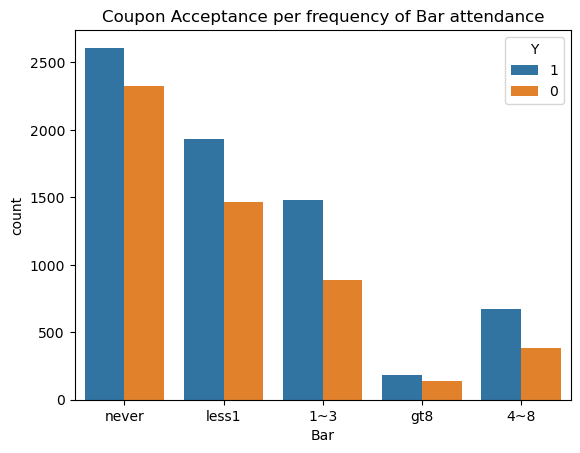

In [232]:

sns.countplot(df, x='Bar', hue='Y').set_title('Coupon Acceptance per frequency of Bar attendance')
plt.savefig('images/coupon_bar_att_hist.png')

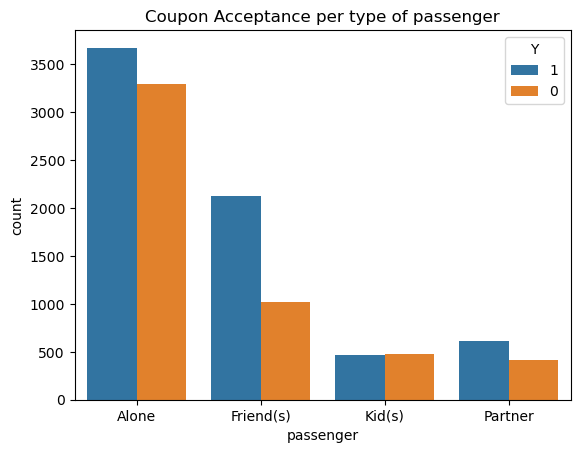

In [233]:
sns.countplot(df, x='passenger', hue='Y').set_title('Coupon Acceptance per type of passenger')
plt.savefig('images/coupon_passenger_hist.png')

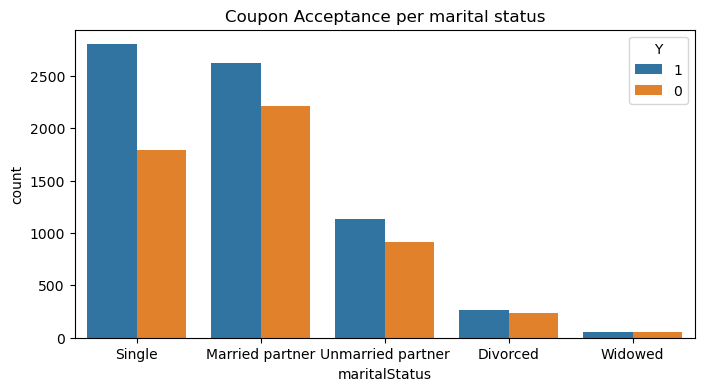

In [234]:
plt.figure(figsize=(8,4))
sns.countplot(df, x='maritalStatus', hue='Y').set_title('Coupon Acceptance per marital status')
plt.savefig('images/coupon_marital_hist.png')

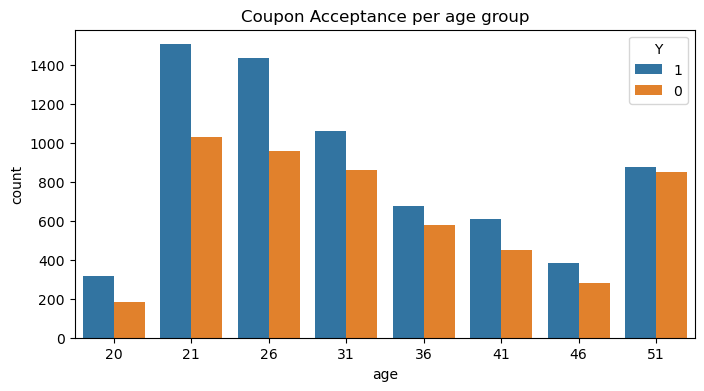

In [235]:
plt.figure(figsize=(8,4))
sns.countplot(df, x='age', hue='Y').set_title('Coupon Acceptance per age group')
plt.savefig('images/coupon_age_hist.png')

In [236]:
df['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


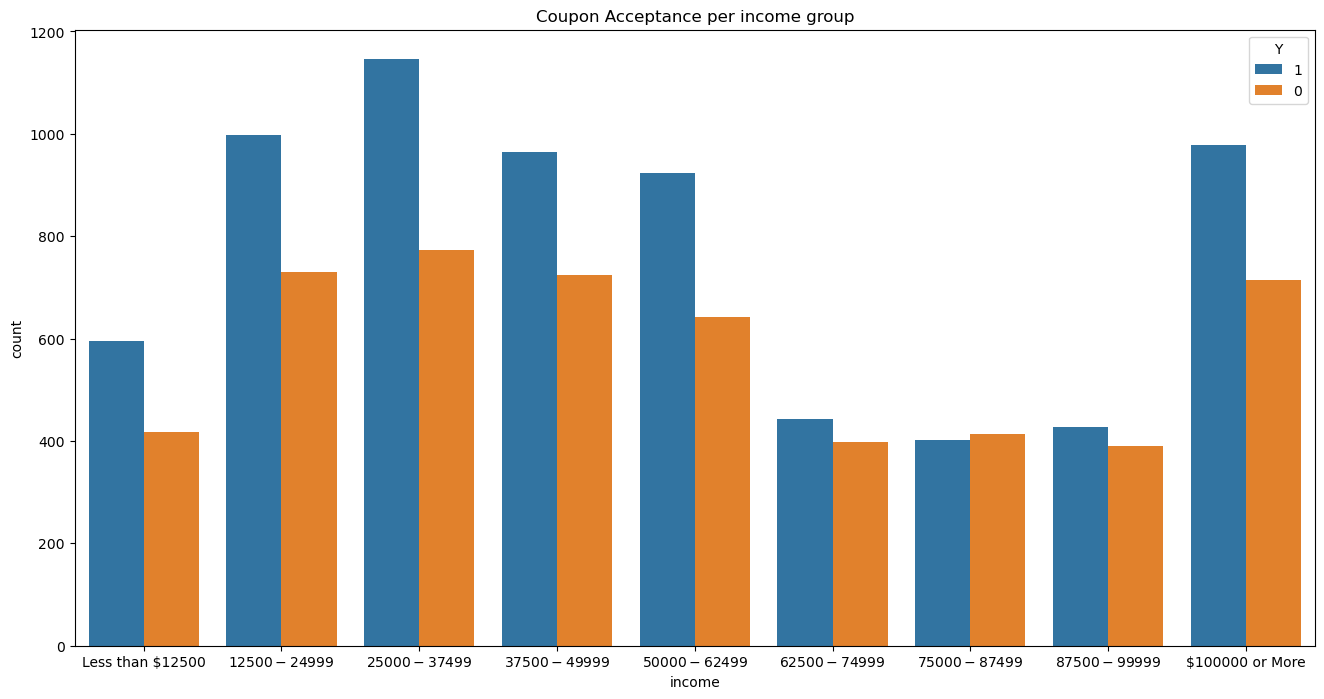

In [237]:
plt.figure(figsize=(16,8))
df['income'] = pd.Categorical(df['income'], categories = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'], ordered = False)
sns.countplot(df, x='income', hue='Y').set_title('Coupon Acceptance per income group')
plt.savefig('images/coupon_income_hist.png')

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [239]:
df['CoffeeHouse'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

In [241]:
df_ch = df[df['coupon']=='Coffee House']

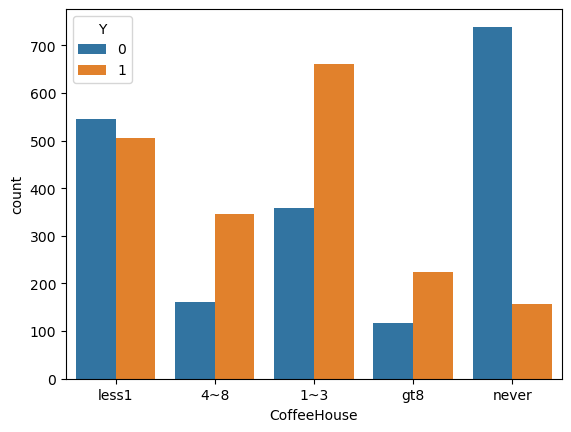

In [250]:
sns.countplot(data = df_ch, x = 'CoffeeHouse', hue = 'Y')
plt.savefig('images/Coffee_House_coupon_Acceptance')

In [245]:
#Goes more than 1 time to coffee house and has income below 50k
ch_morethan1 = ['4~8', '1~3', 'gt8']
income_under50 = ['$12500 - $24999','$37500 - $49999', '$25000 - $37499','Less than $12500']
df_ch_morethan1_under50k = df_ch.query('CoffeeHouse in @ch_morethan1 and income in @income_under50')
print('Acceptance rate for those go to a Coffee House more than once per month, with income under 50k ', df_ch_morethan1_under50k[df_ch_morethan1_under50k['Y']=='1'].size/df_ch_morethan1_under50k.size)
df_ch_lessthan1_over50k = df_ch.query('CoffeeHouse not in @ch_morethan1 or income not in @income_under50')
print('Acceptance rate for those go to a Coffee House less than once per month or have income over 50k ', df_ch_lessthan1_over50k[df_ch_lessthan1_over50k['Y']=='1'].size/df_ch_lessthan1_over50k.size)


Acceptance rate for those go to a Coffee House more than once per month, with income under 50k  0.6952191235059761
Acceptance rate for those go to a Coffee House less than once per month or have income over 50k  0.42532005689900426


/var/folders/rs/kv786cbd67bf8qvm0kd1yjc00000gp/T/ipykernel_18745/2310508979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch['income'] = pd.Categorical(df_ch['income'], categories = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'], ordered = True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-p

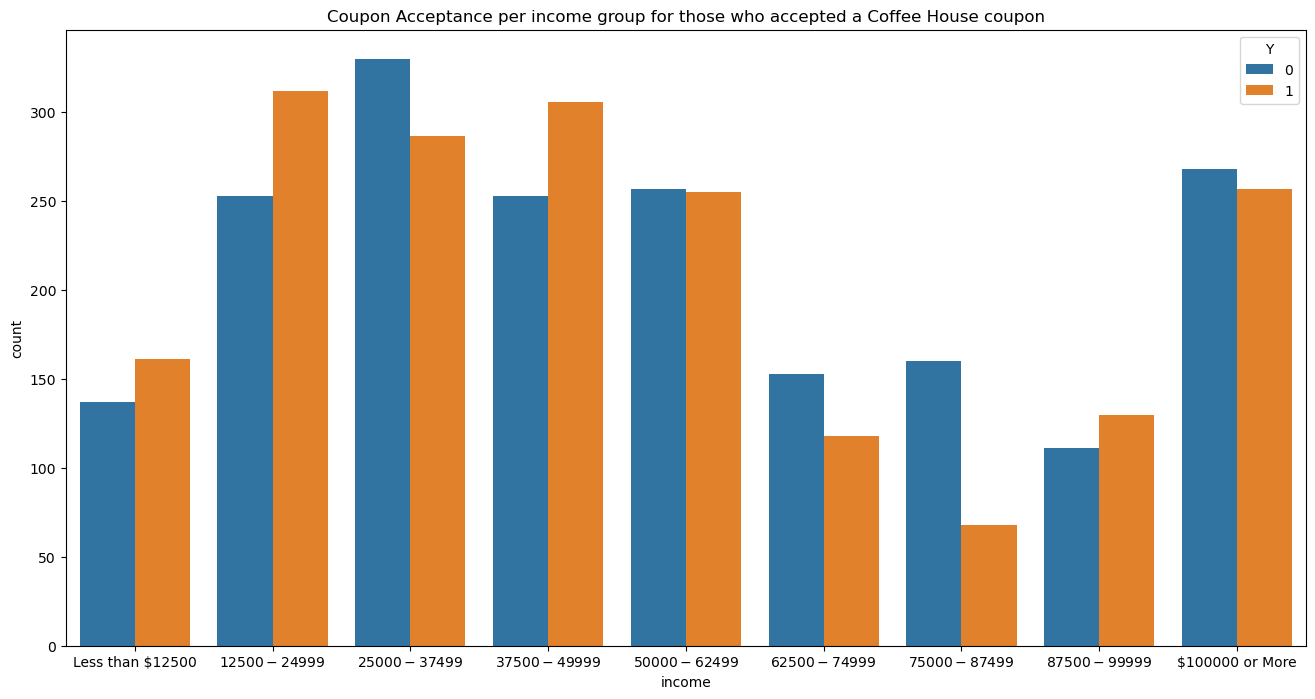

In [249]:
plt.figure(figsize=(16,8))
df_ch['income'] = pd.Categorical(df_ch['income'], categories = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'], ordered = True)
sns.countplot(df_ch, x='income', hue='Y').set_title('Coupon Acceptance per income group for those who accepted a Coffee House coupon')
plt.savefig('images/coffee_house_coupon_income_hist.png')

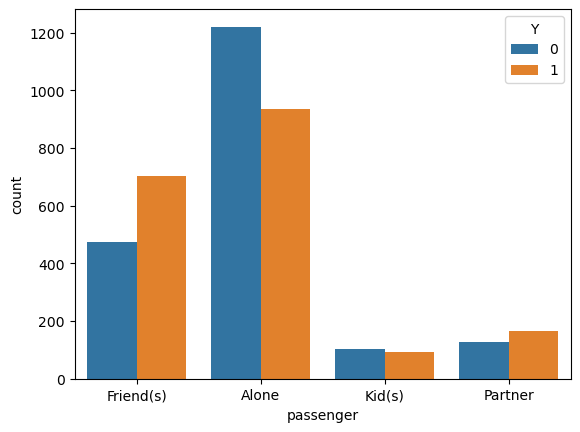

In [251]:
sns.countplot(data = df_ch, x = 'passenger', hue = 'Y')
plt.savefig('images/Coffee_House_coupon_Acceptance based on Passenger')

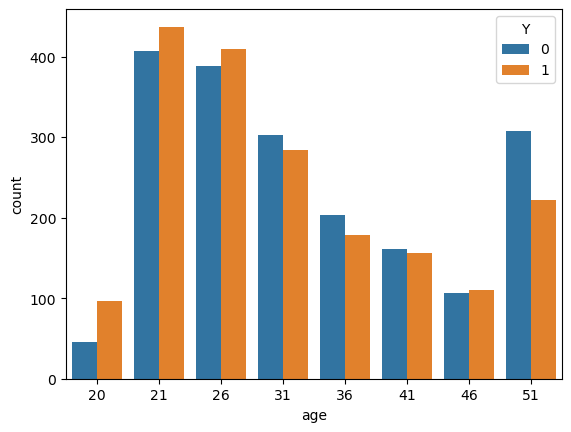

In [252]:
sns.countplot(data = df_ch, x = 'age', hue = 'Y')
plt.savefig('images/Coffee_House_coupon_Acceptance based on Age')